In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.patches import Patch
import requests
import numpy as np
import time

In [3]:
# Census Data https://data.census.gov/
# Land use/Land cover package https://geodata.dep.state.fl.us/datasets/FDEP::statewide-land-use-land-cover/about
# Counties Package https://www.arcgis.com/home/item.html?id=e1a7a11a570a49649a0c8770751667b6

In [4]:
gdf = gpd.read_file("/Users/ehast/Downloads/Statewide_Land_Use_Land_Cover")

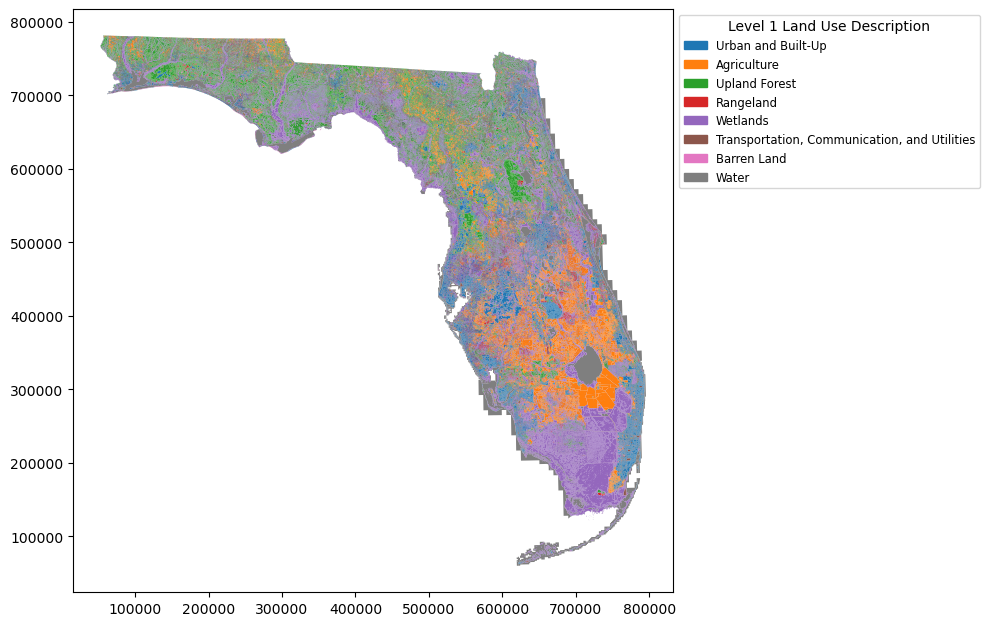

In [5]:
fig, ax = plt.subplots(figsize=(10, 10))

# Create a mapping of LEVEL1_LAN values to their descriptive names
landuse_mapping = dict(zip(gdf['LEVEL1_LAN'], gdf['LEVEL1_L_1']))

# Get a list of unique LEVEL1_LAN values
unique_values = gdf['LEVEL1_LAN'].unique()

# Create a colormap for the unique values
color_map = dict(zip(unique_values, mcolors.TABLEAU_COLORS))

# Loop through each group to plot
for code, group in gdf.groupby('LEVEL1_LAN'):
    color = color_map[code]
    group.plot(ax=ax, color=color)

# Create custom patches for the legend using the descriptive names
legend_patches = [Patch(color=color, label=landuse_mapping[code]) for code, color in color_map.items()]

# Set the legend
ax.legend(handles=legend_patches, title="Level 1 Land Use Description", loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')

# Display the plot
plt.tight_layout()
plt.show()

In [6]:
#Census Data, not sure about use now due to shapefile

In [7]:
url='https://api.census.gov/data/2020/dec/dhc'
params = {
    "get": 'NAME,P1_001N', 
    "for": "county:*",
    "in": "state:12",
    "key": "5520cc76d77e35f1499e60417bf7c8b45c69f66a"}
response = requests.get(url,params=params)

In [8]:
total_population=pd.DataFrame(response.json()[1:], columns=response.json()[0])
total_population

,NAME,P1_001N,state,county
0,"Alachua County, Florida",278468,12,001
1,"Baker County, Florida",28259,12,003
2,"Bay County, Florida",175216,12,005
3,"Bradford County, Florida",28303,12,007
4,"Brevard County, Florida",606612,12,009
...,...,...,...,...
62,"Union County, Florida",16147,12,125
63,"Volusia County, Florida",553543,12,127
64,"Wakulla County, Florida",33764,12,129
65,"Walton County, Florida",75305,12,131


In [9]:
print(total_population['P1_001N'].isna().sum())

0


In [10]:
shape_data = gdf
print(shape_data.columns)

Index(['OBJECTID', 'LANDUSE_CO', 'LANDUSE_DE', 'LEVEL1_LAN', 'LEVEL1_L_1',
       'LEVEL2_LAN', 'LEVEL2_L_1', 'LANDCOVER_', 'LANDCOVE_1', 'WATER_MANA',
       'LANDUSE_YE', 'SHAPEAREA', 'SHAPELEN', 'geometry'],
      dtype='object')


In [11]:
print(shape_data['LANDCOVE_1'])

0          1100: Low Density, <2 dwelling units/acre
1          1100: Low Density, <2 dwelling units/acre
2          1100: Low Density, <2 dwelling units/acre
3          1100: Low Density, <2 dwelling units/acre
4          1100: Low Density, <2 dwelling units/acre
                             ...                    
1416961      8370: Surface Water Collection Features
1416962      8370: Surface Water Collection Features
1416963      8370: Surface Water Collection Features
1416964      8370: Surface Water Collection Features
1416965      8370: Surface Water Collection Features
Name: LANDCOVE_1, Length: 1416966, dtype: object


In [12]:
counties_gdf = gpd.read_file('/Users/ehast/Desktop/mapdata')

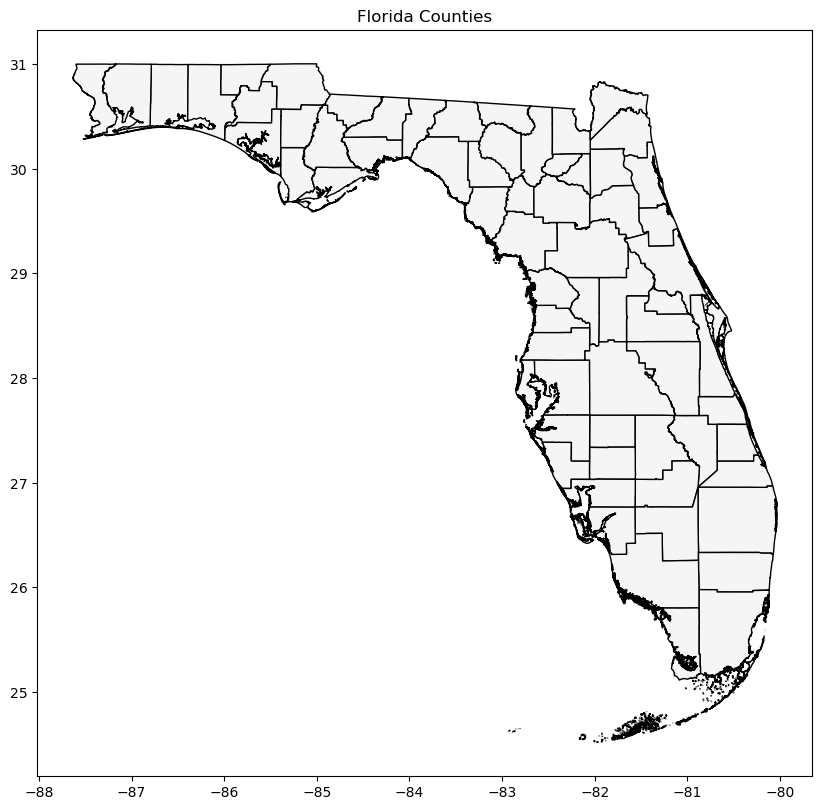

In [13]:
fig, ax = plt.subplots(figsize=(10, 10))
counties_gdf.plot(ax=ax, edgecolor="black", color="whitesmoke")
ax.set_title("Florida Counties")
plt.show()

In [14]:
# Check the CRS of both GeoDataFrames
print("Original shapefile CRS:", shape_data.crs)
print("County shapefile CRS:", counties_gdf.crs)

# Reprojecting to shape
if shape_data.crs != counties_gdf.crs:
    counties_gdf = counties_gdf.to_crs(shape_data.crs)


Original shapefile CRS: EPSG:6439
County shapefile CRS: EPSG:4326


In [15]:
combined_data = gpd.sjoin(shape_data, counties_gdf, how="left", predicate='intersects')

In [16]:
counties_gdf.columns

Index(['NAME', 'STATE_NAME', 'POP2000', 'POP00_SQMI', 'POP2010', 'POP10_SQMI',
       'WHITE', 'BLACK', 'AMERI_ES', 'ASIAN', 'HAWN_PI', 'OTHER', 'MULT_RACE',
       'HISPANIC', 'MALES', 'FEMALES', 'AGE_UNDER5', 'AGE_5_17', 'AGE_18_21',
       'AGE_22_29', 'AGE_30_39', 'AGE_40_49', 'AGE_50_64', 'AGE_65_UP',
       'MED_AGE', 'MED_AGE_M', 'MED_AGE_F', 'HOUSEHOLDS', 'AVE_HH_SZ',
       'HSEHLD_1_M', 'HSEHLD_1_F', 'MARHH_CHD', 'MARHH_NO_C', 'MHH_CHILD',
       'FHH_CHILD', 'FAMILIES', 'AVE_FAM_SZ', 'HSE_UNITS', 'VACANT',
       'OWNER_OCC', 'RENTER_OCC', 'NO_FARMS07', 'AVG_SIZE07', 'CROP_ACR07',
       'AVG_SALE07', 'SQMI', 'geometry'],
      dtype='object')

In [17]:
counties_gdf['POP2010']

0       40564
1     1118349
2      281872
3     1294546
4       74733
       ...   
62     170196
63      26732
64      57960
65      14061
66      73872
Name: POP2010, Length: 67, dtype: int64

In [36]:
combined_data.info() # Plenty of features for possible use now.

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 1429635 entries, 0 to 1416965
Data columns (total 61 columns):
 #   Column       Non-Null Count    Dtype   
---  ------       --------------    -----   
 0   OBJECTID     1429635 non-null  int64   
 1   LANDUSE_CO   1429635 non-null  int64   
 2   LANDUSE_DE   1429635 non-null  object  
 3   LEVEL1_LAN   1429635 non-null  int64   
 4   LEVEL1_L_1   1429635 non-null  object  
 5   LEVEL2_LAN   1429635 non-null  int64   
 6   LEVEL2_L_1   1429635 non-null  object  
 7   LANDCOVER_   1429635 non-null  int64   
 8   LANDCOVE_1   1429635 non-null  object  
 9   WATER_MANA   1429635 non-null  object  
 10  LANDUSE_YE   1429635 non-null  object  
 11  SHAPEAREA    1429635 non-null  float64 
 12  SHAPELEN     1429635 non-null  float64 
 13  geometry     1429635 non-null  geometry
 14  index_right  1426588 non-null  float64 
 15  NAME         1426588 non-null  object  
 16  STATE_NAME   1426588 non-null  object  
 17  POP2000      1426588 non

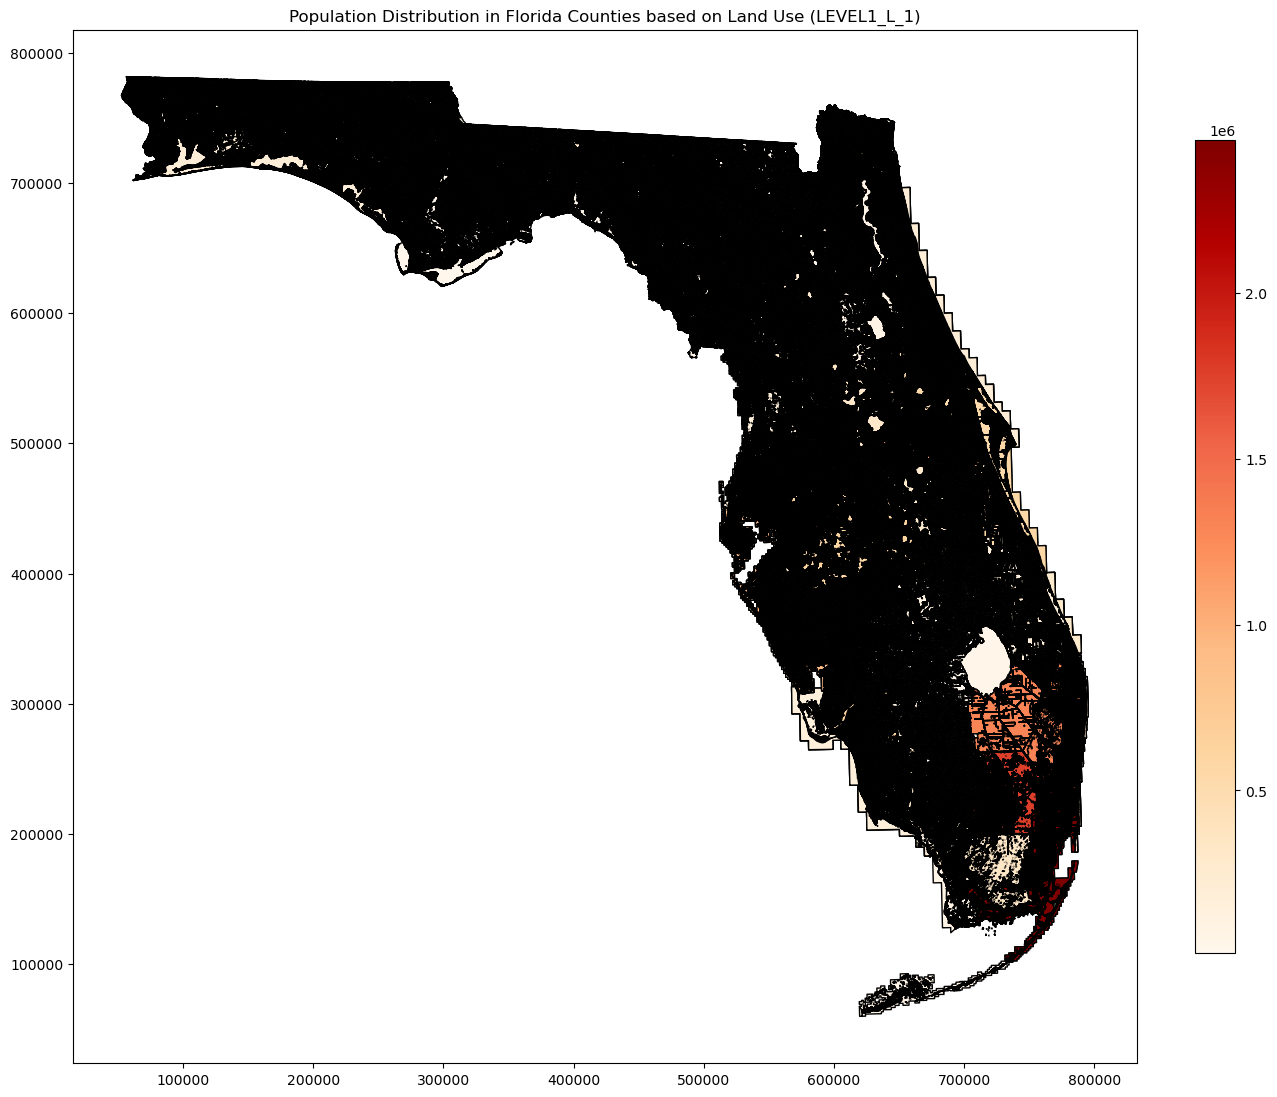

In [19]:
fig, ax = plt.subplots(figsize=(15, 15))

# Plot based on POP2010 and use a colormap to represent the different populations.
cmap = 'OrRd'
norm = mcolors.Normalize(vmin=combined_data['POP2010'].min(), vmax=combined_data['POP2010'].max())

combined_data.plot(column='POP2010', ax=ax, cmap=cmap, edgecolor='black')

# Set title
ax.set_title('Population Distribution in Florida Counties based on Land Use (LEVEL1_L_1)')

# Create the colorbar
cbar = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
fig.colorbar(cbar, ax=ax, orientation='vertical', fraction=0.035, pad=0.05)

plt.show()
#Can't really see anything

In [20]:
print(counties_gdf['NAME'].unique())

['Okeechobee' 'Orange' 'Osceola' 'Palm Beach' 'Putnam' 'Lake' 'Lafayette'
 'Indian River' 'Hardee' 'Glades' 'Gilchrist' 'Gulf' 'Pinellas'
 'Highlands' 'Hillsborough' 'Hendry' 'Hernando' 'Union' 'Taylor' 'Collier'
 'DeSoto' 'Dixie' 'Sarasota' 'Seminole' 'St. Lucie' 'Sumter' 'Levy' 'Lee'
 'Wakulla' 'St. Johns' 'Volusia' 'Pasco' 'Polk' 'Franklin' 'Flagler'
 'Brevard' 'Bradford' 'Alachua' 'Clay' 'Broward' 'Charlotte' 'Citrus'
 'Monroe' 'Miami-Dade' 'Martin' 'Marion' 'Manatee' 'Jackson' 'Holmes'
 'Okaloosa' 'Jefferson' 'Hamilton' 'Washington' 'Suwannee' 'Columbia'
 'Santa Rosa' 'Madison' 'Liberty' 'Leon' 'Escambia' 'Duval' 'Gadsden'
 'Bay' 'Baker' 'Walton' 'Calhoun' 'Nassau']


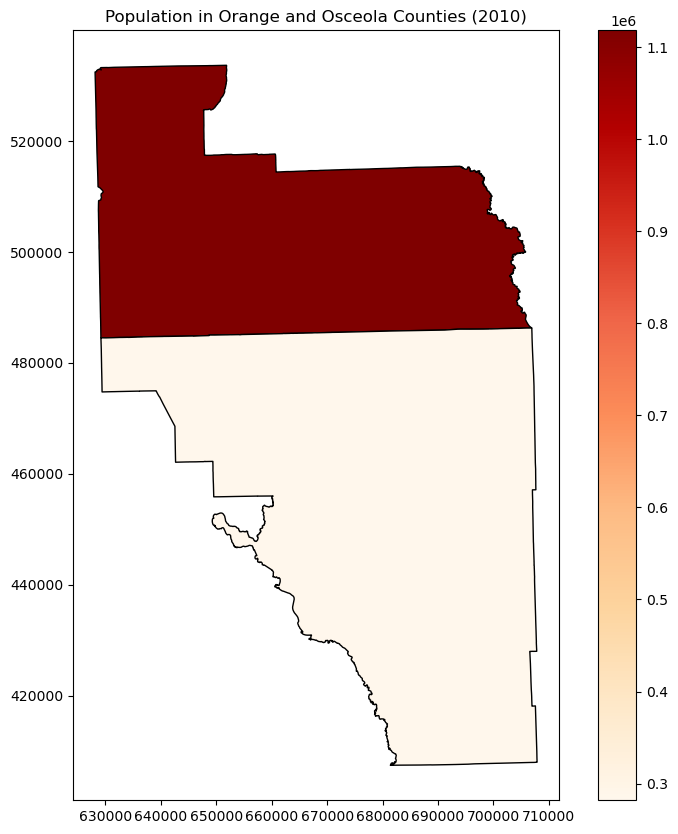

In [21]:
#Let's plot something smaller to test the idea
# Filter out only 'Orange' and 'Osceola' counties
orange_osceola = counties_gdf[counties_gdf['NAME'].isin(['Orange', 'Osceola'])]

# Checking if the filtered dataframe has any entries
if not orange_osceola.empty:
    # Plotting the data
    fig, ax = plt.subplots(figsize=(10, 10))
    orange_osceola.plot(column='POP2010', ax=ax, cmap='OrRd', edgecolor='black', legend=True)
    ax.set_title('Population in Orange and Osceola Counties (2010)')
    
    # Adjusting the legend
    leg = ax.get_legend()
    if leg:
        leg.set_bbox_to_anchor((1, 0.5))
    plt.show()
else:
    print("The filtered dataframe is empty.")


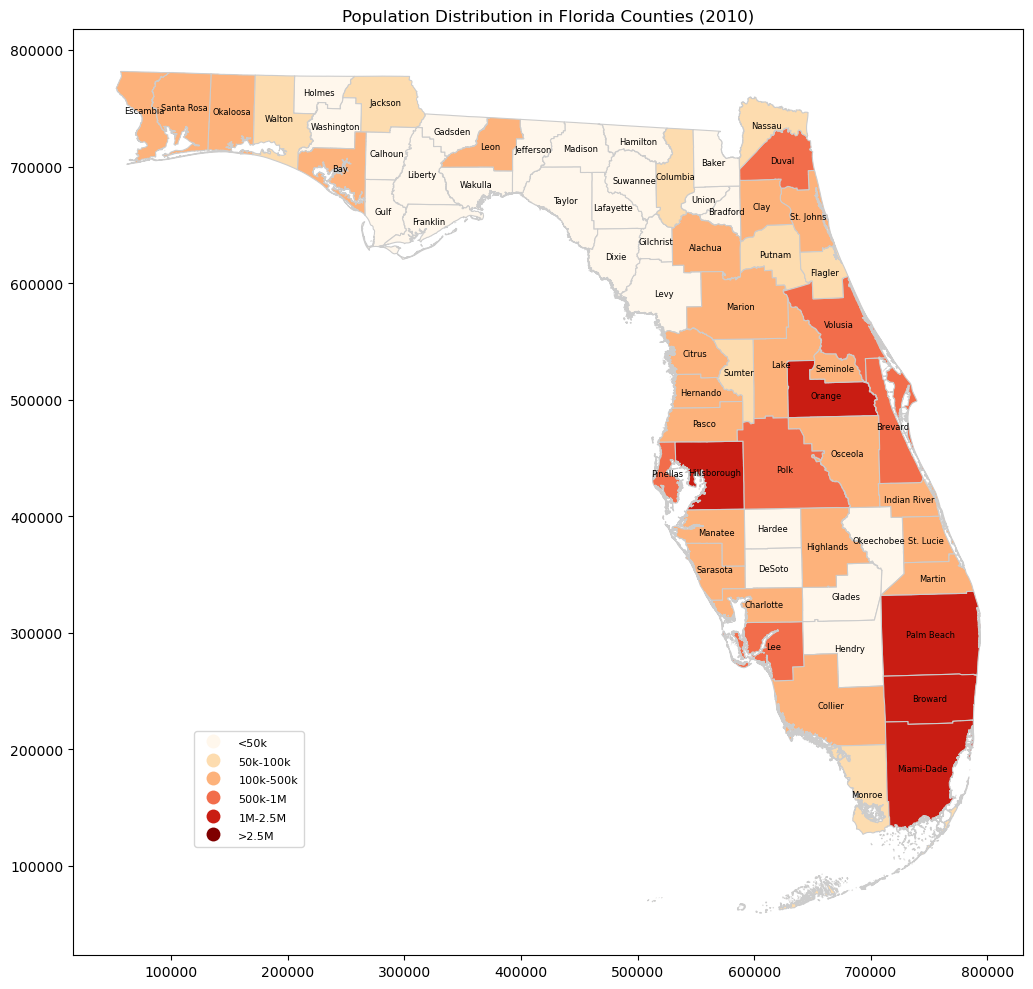

In [22]:
# Define custom bins for population
bin_edges = [0, 50000, 100000, 500000, 1000000, 2500000, 3000000]  
bin_labels = ['<50k', '50k-100k', '100k-500k', '500k-1M', '1M-2.5M', '>2.5M']


# Categorize the data
counties_gdf['category'] = pd.cut(counties_gdf['POP2010'], bins=bin_edges, labels=bin_labels, include_lowest=True)

# Create a custom colormap
colors = plt.cm.OrRd(np.linspace(0, 1, len(bin_edges) - 1))
cmap = plt.matplotlib.colors.ListedColormap(colors)

# Plotting the data
fig, ax = plt.subplots(figsize=(15, 10))
counties_gdf.plot(column='category', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add county names to the plot
for x, y, label in zip(counties_gdf.geometry.centroid.x, counties_gdf.geometry.centroid.y, counties_gdf['NAME']):
    ax.text(x, y, label, fontsize=6, ha='center', va='center')

# Adjust the legend
leg = ax.get_legend()
leg.set_bbox_to_anchor((0, 0, 0.25, 0.25))  # Adjust the bounding box to increase the size
for label in leg.get_texts():
    label.set_fontsize(8)  # Set text size
for handle in leg.legend_handles:
    handle.set_linewidth(2.0)  # Set line width

# Set title and adjust layout
ax.set_title('Population Distribution in Florida Counties (2010)')
fig.tight_layout()

plt.show()


In [23]:
# elevation data https://en-au.topographic-map.com/place-q9knh/Florida/
# Data is in meters
data = {
    'NAME': ['Osceola', 'Orange', 'Okeechobee', 'Palm Beach', 'Putnam', 'Lake', 
               'Lafayette', 'Indian River', 'Hardee', 'Glades', 'Gilchrist', 'Gulf', 'Pinellas', 'Highlands',
               'Hillsborough', 'Hendry', 'Hernando', 'Union', 'Taylor', 'Collier', 'DeSoto', 'Dixie', 'Sarasota',
               'Seminole', 'St. Lucie', 'Sumter', 'Levy', 'Lee', 'Wakulla', 'St. Johns', 'Volusia', 'Pasco', 'Polk',
               'Franklin', 'Flagler', 'Brevard', 'Bradford', 'Alachua', 'Clay', 'Broward', 'Charlotte', 'Citrus',
               'Monroe', 'Miami-Dade', 'Martin', 'Marion', 'Manatee', 'Jackson', 'Holmes', 'Okaloosa', 'Jefferson', 
               'Hamilton', 'Washington', 'Suwannee', 'Columbia', 'Santa Rosa', 'Madison', 'Liberty', 'Leon', 
               'Escambia', 'Duval', 'Gadsden', 'Bay', 'Baker', 'Walton', 'Calhoun', 'Nassau' ],
    'AVG ELEVATION': [19, 112, 12, 5, 17, 56, 22, 8, 8, 12, 19, 5, 4, 22, 20, 8, 18, 41, 8, 5, 18, 7, 7, 14, 8,
                     27, 11, 5, 10, 6, 8, 18, 33, 4, 6, 9, 45, 33, 29, 5, 10, 14, 1, 3, 6, 24, 13, 44, 39, 37, 23,
                     37, 31, 27, 36, 32, 33, 27, 38, 30, 11, 50, 13, 40, 31, 31, 13]
}

elevation_df = pd.DataFrame(data)

print(elevation_df)

          NAME  AVG ELEVATION
0      Osceola             19
1       Orange            112
2   Okeechobee             12
3   Palm Beach              5
4       Putnam             17
..         ...            ...
62         Bay             13
63       Baker             40
64      Walton             31
65     Calhoun             31
66      Nassau             13

[67 rows x 2 columns]


In [24]:
selected_features = ['NAME', 'LEVEL1_LAN', 'LEVEL1_L_1', 'POP2010', 'geometry']
filtered_data = combined_data[selected_features].copy()

In [25]:
merged_data = filtered_data.merge(elevation_df[['NAME', 'AVG ELEVATION']], on='NAME', how='left')

In [26]:
sea_level_rise_2150 = 3.92  # 28 cm/year * 127 years in meters
merged_data['elevation_post_rise'] = merged_data['AVG ELEVATION'] - sea_level_rise_2150

In [27]:
growth_rate = 0.01  # Example 1% growth rate per year
years_diff = 2150 - 2023
merged_data['POP2150'] = merged_data['POP2010'] * (1 + growth_rate)**years_diff

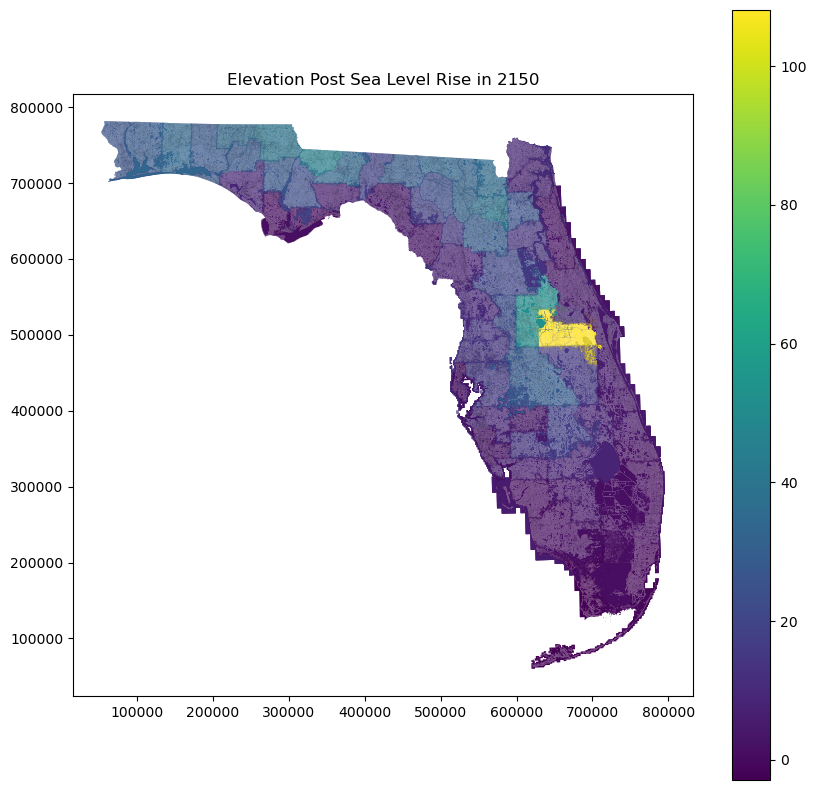

In [28]:
merged_data.plot(column='elevation_post_rise', legend=True, figsize=(10,10))
plt.title('Elevation Post Sea Level Rise in 2150')
plt.show()

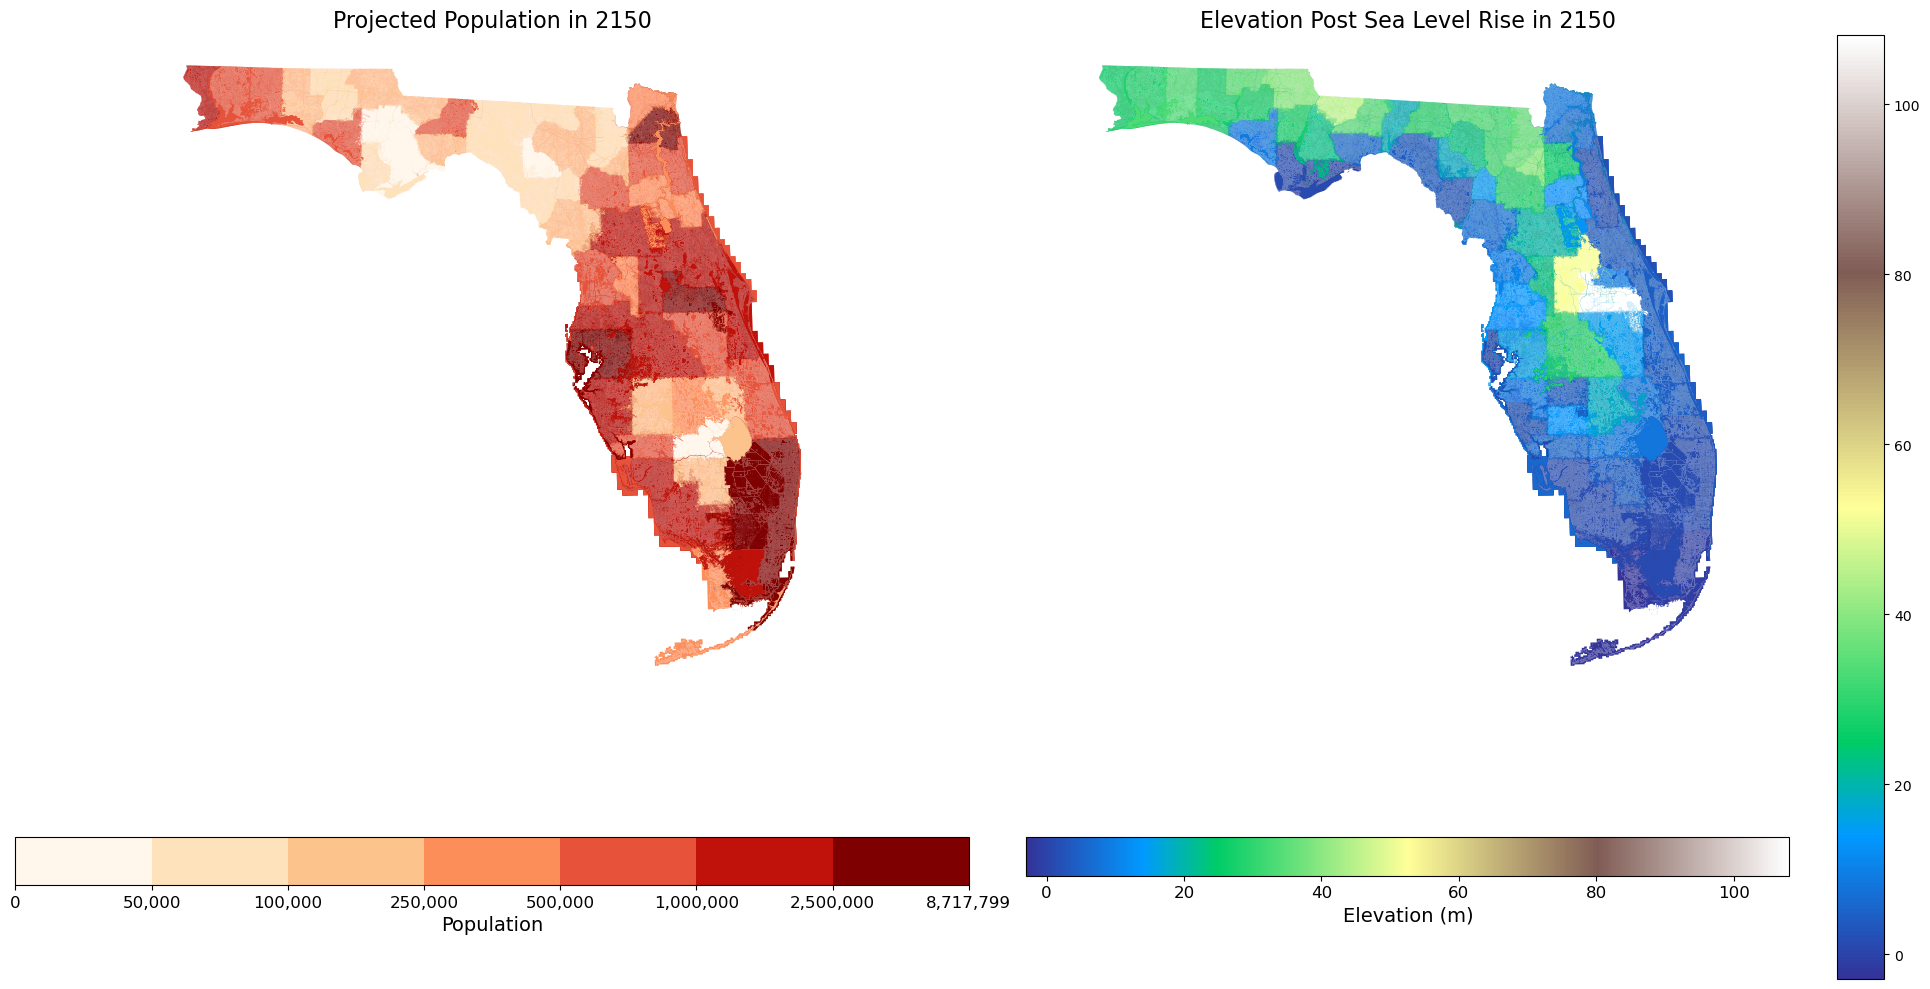

In [29]:
# Define the custom bins and their labels for the colorbar
bins = [0, 50000, 100000, 250000, 500000, 1000000, 2500000, merged_data['POP2150'].max()]
bin_labels = [f"{int(b):,}" for b in bins]

fig, ax = plt.subplots(1, 2, figsize=(20,10))

# For Population
cmap = plt.cm.OrRd
norm = mcolors.BoundaryNorm(bins, cmap.N)
pop_plot = merged_data.plot(column='POP2150', ax=ax[0], cmap=cmap, legend=False, norm=norm)
ax[0].set_title('Projected Population in 2150', fontsize=16)
ax[0].axis('off')
# Create a custom colorbar for Population
cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ticks=bins, ax=ax[0], orientation='horizontal')
cbar.set_label('Population', fontsize=14)
cbar.ax.set_xticklabels(bin_labels, fontsize=12)

# For Elevation Post Sea Level Rise in 2150
elev_plot = merged_data.plot(column='elevation_post_rise', ax=ax[1], legend=True, cmap='terrain')
ax[1].set_title('Elevation Post Sea Level Rise in 2150', fontsize=16)
ax[1].axis('off')
# Adjust colorbar size and label
elev_cbar = ax[1].get_figure().colorbar(elev_plot.collections[0], ax=ax[1], orientation='horizontal')
elev_cbar.set_label('Elevation (m)', fontsize=14)
elev_cbar.ax.tick_params(labelsize=12)

plt.tight_layout()
plt.show()

In [30]:
# Income data
income_data = pd.read_excel('/Users/ehast/Downloads/AllCounties_Data.xlsx')
# Rename columns for clarity
income_data.rename(columns={
    'Median Household Income, Dollars, 2010': 'NAME',
    'Unnamed: 1': 'Income/year'
}, inplace=True)
# Drop the first row
income_data = income_data.drop(0)

# Reset the index
income_data.reset_index(drop=True, inplace=True)

In [31]:
print(income_data.isna().sum())

NAME           0
Income/year    0
dtype: int64


In [32]:
merged_data = pd.merge(merged_data, income_data, on='NAME', how='left')

In [33]:
merged_data.isna().sum()

NAME                   3047
LEVEL1_LAN                0
LEVEL1_L_1                0
POP2010                3047
geometry                  0
AVG ELEVATION          3047
elevation_post_rise    3047
POP2150                3047
Income/year            3047
dtype: int64

In [39]:
merged_data = gpd.GeoDataFrame(merged_data, geometry='geometry')
merged_data

,NAME,LEVEL1_LAN,LEVEL1_L_1,POP2010,geometry,AVG ELEVATION,elevation_post_rise,POP2150,Income/year
0,Indian River,1000,Urban and Built-Up,143385.0,"POLYGON ((750115.595 412370.468, 750125.324 41...",8.0,4.08,5.073623e+05,47341.0
1,Indian River,1000,Urban and Built-Up,143385.0,"POLYGON ((752116.494 412629.206, 752040.467 41...",8.0,4.08,5.073623e+05,47341.0
2,Indian River,1000,Urban and Built-Up,143385.0,"POLYGON ((748400.901 412660.544, 748403.552 41...",8.0,4.08,5.073623e+05,47341.0
3,Indian River,1000,Urban and Built-Up,143385.0,"POLYGON ((749089.150 412759.063, 749113.236 41...",8.0,4.08,5.073623e+05,47341.0
4,Indian River,1000,Urban and Built-Up,143385.0,"POLYGON ((749593.376 412700.825, 749598.792 41...",8.0,4.08,5.073623e+05,47341.0
...,...,...,...,...,...,...,...,...,...
1429630,Duval,8000,"Transportation, Communication, and Utilities",904256.0,"POLYGON ((606308.584 690825.491, 606319.365 69...",11.0,7.08,3.199675e+06,49463.0
1429631,Duval,8000,"Transportation, Communication, and Utilities",904256.0,"POLYGON ((643661.752 690823.946, 643761.300 69...",11.0,7.08,3.199675e+06,49463.0
1429632,Duval,8000,"Transportation, Communication, and Utilities",904256.0,"POLYGON ((614337.328 690853.445, 614339.132 69...",11.0,7.08,3.199675e+06,49463.0
1429633,Duval,8000,"Transportation, Communication, and Utilities",904256.0,"POLYGON ((607913.965 690876.014, 607916.721 69...",11.0,7.08,3.199675e+06,49463.0


In [35]:
merged_data['Income/year'] = merged_data['Income/year'].astype(float)

In [61]:
# Export file
merged_data.to_file("/Users/ehast/Desktop/cleaned florida data/cleaned_fl_data.shp")

/var/folders/vh/mx4xfd715vxfvctwd1zfbjhr0000gn/T/ipykernel_80165/29407599.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  merged_data.to_file("/Users/ehast/Desktop/cleaned florida data/cleaned_fl_data.shp")
